In [1]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt
import pdb
from scipy import integrate
import matplotlib as mpl
from scipy import interpolate
import time

from ABM_package import *

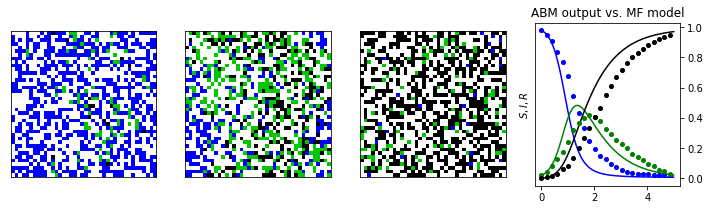

In [3]:
#parameters
ri = 0.1
rr = ri/10.0
rm = 1.0

#final time point
T_end = 5.0
t = np.linspace(0,T_end/rr,100)
plot_ind = [2,7,15]

#initial fraction of susceptible (S), infected (I), and recovered (R) agents
# (should sum to less than 1)

s0 = 0.49
i0 = 0.01
r0 = 0
N = s0 + i0 + r0

#simulate ABM
S,I,R,t,A_list,_ = SIR_ABM(ri,rr,rm,T_end)

#simulate mean-field model
SIR_y = ODE_sim(np.array([ri*N,rr]),SIR_ODE,t,np.array([s0/N,i0/N,r0/N]))

#plot!
fig = plt.figure(figsize=(12,3))

cmaplist = [(1.0,1.0,1.0,1.0),(0.0,0.0,1.0,1.0),(0.0,200.0/256.0,0.0,1.0),(0.0,0.0,0.0,1.0)]
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, N = 4)

for i in np.arange(3):

    ax = fig.add_subplot(1,4,1+i,adjustable='box')
    ax.matshow(A_list[plot_ind[i]],cmap=cmap,vmax=3)
    ax.set_xticks([])
    ax.set_yticks([])




ax = fig.add_subplot(1,4,4)

#Mean-field model
ax.plot(rr*t,SIR_y[0,:],'b-',label="S")
ax.plot(rr*t,SIR_y[1,:],'g-',label="I")
ax.plot(rr*t,SIR_y[2,:],'k-',label="R")

atit = ax.set_title("ABM output vs. MF model")
atit.set_position((0.5,1.05))
ax.set_ylabel("$S,I,R$")
ax.yaxis.tick_right()

#ABM output
ax.plot(rr*t[::4],S[::4],'b.',markersize=8)
ax.plot(rr*t[::4],I[::4],'g.',markersize=8)
ax.plot(rr*t[::4],R[::4],'k.',markersize=8)

## Save data for EQL 

In [ ]:
rm = 1.0
reals = 5
T_end = 5.0

In [ ]:
def finite_diff(C,dt):
    dCdt = np.zeros(C.shape)
    dCdt[1:-1] = (C[2:] - C[:-2])/(2*dt)
    dCdt[0] = (C[1] - C[0])/dt
    dCdt[-1] = (C[-1] - C[-2])/dt

    return dCdt


In [ ]:
## Note: This code will take very long for large "reals" values and small values of "ri"

#loop over infection rates
for ri in [.25]:#[.25,.1,.01,.005]:
    #loop over recovery rates
    for rr in [ri]:#,ri/2.0,ri/4.0,ri/10.0]:

        print("parameter values P_I = " + str(ri) + ", P_R = " +str(rr))
    
        for i in np.arange(reals):
            print("    Computing realization: "+ str(i))

            #compute ABM
            S,I,R,t,A_list,N = SIR_ABM(ri,rr,rm,T_end)

            #save to variable
            if i == 0:
                S_reals = S[:,np.newaxis]
                I_reals = I[:,np.newaxis]
                R_reals = R[:,np.newaxis]
            else:
                S_reals = np.hstack([S_reals,S[:,np.newaxis]])
                I_reals = np.hstack([I_reals,I[:,np.newaxis]])
                R_reals = np.hstack([R_reals,R[:,np.newaxis]])
            
        #save to file
        t = t[:,np.newaxis]
        S = np.mean(S_reals,axis=1)[:,np.newaxis]
        I = np.mean(I_reals,axis=1)[:,np.newaxis]
        R = np.mean(R_reals,axis=1)[:,np.newaxis]

        S_std = np.std(S_reals,axis=1)[:,np.newaxis]
        I_std = np.std(I_reals,axis=1)[:,np.newaxis]
        R_std = np.std(R_reals,axis=1)[:,np.newaxis]

        dt = t[1] - t[0]

        St = finite_diff(S,dt)
        It = finite_diff(I,dt)
        Rt = finite_diff(R,dt)

        variables = np.hstack((t,S,St,I,It,R,Rt))
        variable_names = ['t','S','St','I','It','R','Rt']

        data = {}

        data['variables'] = variables 
        data['variable_names'] = variable_names

        data['rr'] = rr
        data['ri'] = ri
        data['rm'] = rm

        np.save("../data/SIR_ABM_TEST_ri_"+str(round(ri,3)) + "_rr_"+str(round(rr,3)) + "_real"+str(i+1)+".npy",data)